In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Fetch historical data for S&P 500
sp500 = yf.download("^GSPC", start="2010-01-01", end="2023-01-01")['Adj Close']

# Calculate daily and annualized returns
daily_returns = sp500.pct_change().dropna()
annualized_return = np.mean(daily_returns) * 252
annualized_volatility = daily_returns['^GSPC'].std() * np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


In [12]:
# Risk-free rate (assume 2% for Sharpe Ratio calculation)
risk_free_rate = 0.02

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility

# Calculate Maximum Drawdown
cumulative_returns = (1 + daily_returns).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()

In [14]:
# Print results
print("S&P 500 Risk Profile:")
print(f"Annualized Return: {annualized_return * 100:.2f}%")
print(f"Annualized Volatility: {annualized_volatility * 100:.2f}%")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown.iloc[0] * 100:.2f}%")

S&P 500 Risk Profile:
Annualized Return: 11.00%
Annualized Volatility: 17.81%
Sharpe Ratio: 0.51
Maximum Drawdown: -33.92%


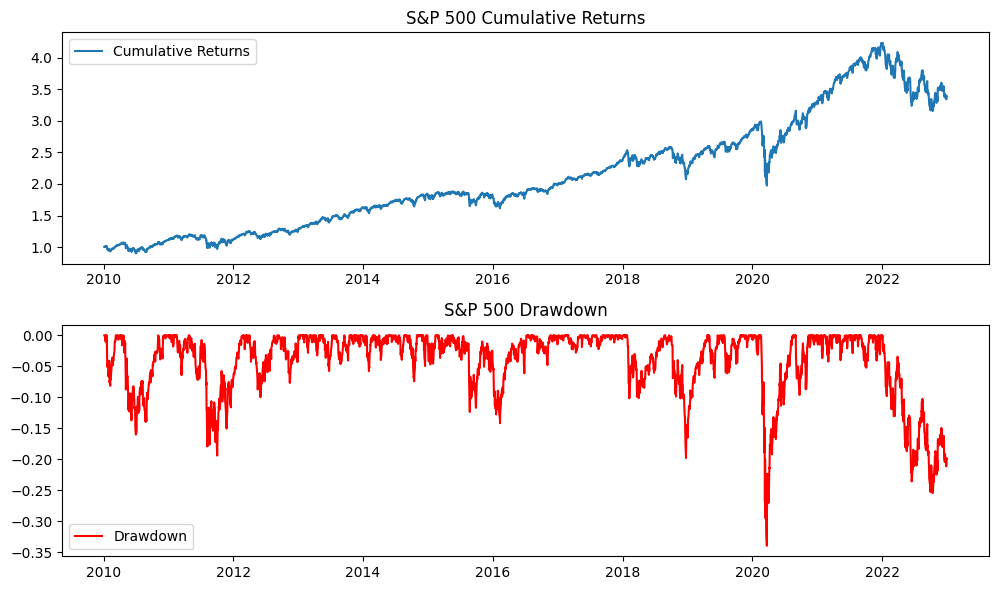

In [15]:
# Visualize the cumulative returns and drawdowns
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(cumulative_returns, label="Cumulative Returns")
plt.title("S&P 500 Cumulative Returns")
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(drawdown, label="Drawdown", color="red")
plt.title("S&P 500 Drawdown")
plt.legend()
plt.tight_layout()
plt.show()